# Problema Extra
Guille, un entusiasta de la calistenia desea maximizar la efectividad de su rutina de dominadas. Para ello, ha seleccionado dos ejercicios clave:
con agarre supino para el bíceps y agarre prono para la espalda. 
Por cada set de dominadas con agarre prono que realiza, trabaja un 15% de su espalda y un 8% de su bíceps. Cada set de dominadas con
agarre prono le lleva 3 minutos.
Por cada set de agarre supino que hace, trabaja un 4% de su espalda y un 12% de su bíceps. Cada set de agarre supino le toma 2 minutos.
Desea trabajar su espalda al menos en un 150% y su bíceps en un 140%. Además, para prevenir lesiones, no quiere hacer más de 20 sets de
dominadas en total.
Por último, no es necesario completar los sets. Puede hacer 2 sets y medio por ejemplo.
El objetivo es determinar cuántos sets de cada ejercicio debe realizar para minimizar el tiempo que está efectivamente entrenando

### Planteo de la resolución

#### Variables de decisión
- $sup:$ número de sets con agarre supino
- $pro:$ número de sets con agarre prono

#### Funciones objetivo
- $\text{Min tiempo} = 3 \cdot pro + 2 \cdot sup$

#### Restricciones
- $trabajo\_espalda = 0.15 \cdot pro + 0.04 \cdot sup \geq 1.5$
- $trabajo\_biceps = 0.08 \cdot pro + 0.12 \cdot sup \geq 1.4$
- $pro + sup \leq 20$

## Libraries

In [1]:
from ortools.linear_solver import pywraplp
import matplotlib.pyplot as plt
import numpy as np

## Problem Definition

In [2]:
solver = pywraplp.Solver.CreateSolver('GLOP')

Variables de decisión:

In [3]:
sup = solver.NumVar(0, solver.infinity(), 'Número de sets con agarre supino.')
pro = solver.NumVar(0, solver.infinity(), 'Número de sets con agarre prono.')

Restricciones

In [4]:
rest_trabajo_espalda = solver.Add(0.15 * pro + 0.04 * sup >= 1.5, 'Mínimo trabajo de la espalda.')
rest_trabajo_biceps = solver.Add(0.08 * pro + 0.12 * sup >= 1.4, 'Mínimo trabajo de los biceps.')
total_sets = solver.Add(pro +  sup <= 20, 'Número total de sets.')

## Optimization

In [5]:
solver.Minimize(3 * pro + 2 * sup)
status = solver.Solve()

if status == pywraplp.Solver.OPTIMAL:
    print('El problema tiene una solución óptima')
else:
    print('No se encontró una solución óptima')

El problema tiene una solución óptima


In [6]:
pro_optimo = pro.solution_value()
sup_optimo = sup.solution_value()

print(f'La cantidad óptima de sets con agarre prono son :{pro_optimo}')
print(f'La cantidad óptima de sets con agarre supino son :{sup_optimo}')

La cantidad óptima de sets con agarre prono son :8.37837837837838
La cantidad óptima de sets con agarre supino son :6.081081081081077


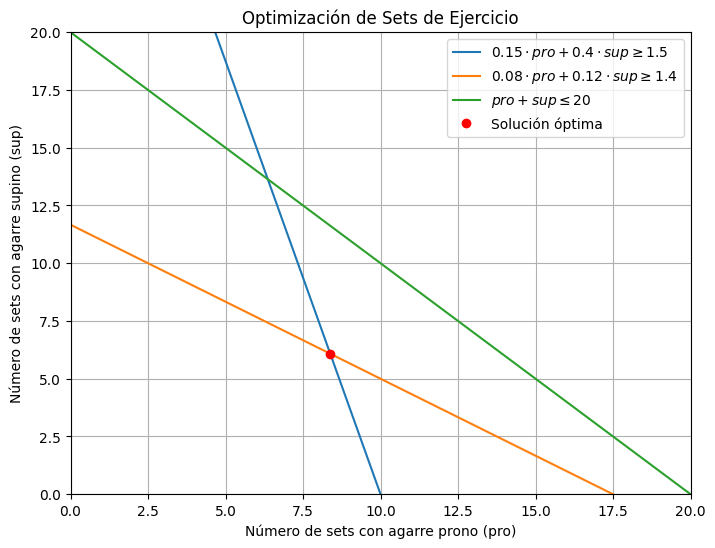

In [7]:
# Define the feasible region constraints
x = np.linspace(0, 30, 400)
y1 = (1.5 - 0.15 * x) / 0.04
y2 = (1.4 - 0.08 * x) / 0.12
y3 = np.minimum(20 - x, np.inf)  # This represents pro + sup <= 20

# Plot the feasible region
plt.figure(figsize=(8, 6))
plt.plot(x, y1, label=r'$0.15 \cdot pro + 0.4 \cdot sup \geq 1.5$')
plt.plot(x, y2, label=r'$0.08 \cdot pro + 0.12 \cdot sup \geq 1.4$')
plt.plot(x, y3, label=r'$pro + sup \leq 20$')

# Plot the optimal solution point
if status == pywraplp.Solver.OPTIMAL:
    plt.plot(pro_optimo, sup_optimo, 'ro', label='Solución óptima')

plt.xlabel('Número de sets con agarre prono (pro)')
plt.ylabel('Número de sets con agarre supino (sup)')
plt.title('Optimización de Sets de Ejercicio')
plt.legend()
plt.grid(True)
plt.xlim(0, 20)
plt.ylim(0, 20)
plt.show()

## Cálculo de los precio sombra

In [8]:
rest_trabajo_espalda.dual_value() # cuanto me aumenta mi función objetivo si aumento en 1 unidad el lado derecho de la restricción

13.513513513513514

In [10]:
activities = solver.ComputeConstraintActivities()